In [2]:
import pandas as pd
import numpy as np

f19_sales = pd.read_csv('../data/F19Sales.csv')
sales = f19_sales
sales.rename(columns = {'Customer ID':'ID Value'}, inplace = True)

alum = pd.read_csv('../data/AlumniReport.csv')

merge = pd.merge(left=sales, right=alum, on=['ID Value'])

merge.head()

,ID Value,Item,Qty,PL,PT,I Disp,Seatblock,Priority Points,Item Cost,Csz,...,Item Name,Degree,ID Type,Primary Degree Institution,Primary Degree Class Year,Primary Degree Education College,Primary Degree Education Status,Primary Address Country,Primary Address State,Primary Address Zip Code
0,122853,F10,1,1,SHP,E (Email),"1:23:43:3,3",999.13,75.29,"Frisco, TX 75034",...,Michigan State,B.S.E.(E.E.) 1966 College of Engineering,Athletics Ticket ID,University of Michigan - Ann Arbor,1966.0,College of Engineering,Graduated,United States,Texas,75034
1,26314,F08,2,5,PD,M (Mail),"1:15:33:6,5",998.13,290.00,"Saint Joseph, MI 49085",...,Notre Dame,"Attended 1959 College of Lit, Science & Arts; ...",Athletics Ticket ID,University of Michigan - Ann Arbor,1964.0,Law School,Graduated,United States,Michigan,49085
2,433040,F05,3,9,TP,MD (Mobile Delivery),"1:311E:8:13,11",997.48,225.87,"Wilmington, DE 19807",...,Iowa,"A.B. 1984 College of Lit, Science & Arts",Athletics Ticket ID,University of Michigan - Ann Arbor,1984.0,"College of Lit, Science & Arts",Graduated,United States,Delaware,19807
3,433040,F12,2,9,TP,MD (Mobile Delivery),"1:311E:8:13,12",997.48,150.52,"Wilmington, DE 19807",...,Ohio State,"A.B. 1984 College of Lit, Science & Arts",Athletics Ticket ID,University of Michigan - Ann Arbor,1984.0,"College of Lit, Science & Arts",Graduated,United States,Delaware,19807
4,57747,F10,4,5,PD,M (Mail),"1:35:93:24,21",994.83,604.00,"Grosse Pointe Farms, MI 48236",...,Michigan State,"A.B. 1978 College of Lit, Science & Arts",Associated Athletics Ticket ID,University of Michigan - Ann Arbor,1978.0,"College of Lit, Science & Arts",Graduated,United States,Michigan,48236


In [3]:
total_tickets_sold = 0
for qty in sales['Qty']:
    qty = qty.replace(',', '')
    total_tickets_sold += int(qty)

# Total number of tickets sold
total_tickets_sold

207092

In [16]:
# Find a alum grad. year for every ticket sold
sales_graduation_years = []
for i, year in enumerate(merge['Primary Degree Class Year']):
    for _ in range(int(merge['Qty'][i])):
        sales_graduation_years.append(int(year))

# Number of alum tickets sold
print(len(sales_graduation_years))

# Prop of tickets sold to alum
len(sales_graduation_years) / total_tickets_sold

22507


0.10868116585865219

In [24]:
# Find total money spent on tickets
total_money_spent = np.sum(sales['Item Cost'])
print(total_money_spent)

# Find total money spent on tickets by alumni
total_money_spent_alum = np.sum(merge['Item Cost'])
print(total_money_spent_alum)

# Prop of revenue generated by alum
total_money_spent_alum / total_money_spent


17150858.839999996
2134287.34


0.12444200957577238

In [ ]:
# Alum buy 10.87% of all tickets, but generate 12.44% of all revenue

# Takeaway: Alumni spent about (12.44/10.87) = 1.1450 times more on tickets than the general public

# Alumni are more willing to spend money on FB tix

Text(0.5, 0, 'Graduation Year')

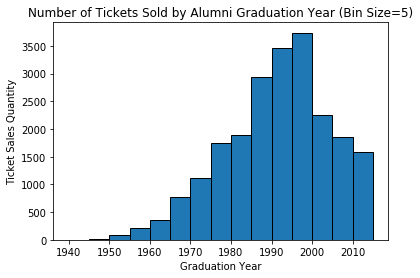

In [11]:
import matplotlib.pyplot as plt

# Clean data, remove any years below 1900
while np.min(sales_graduation_years) < 1900:
    sales_graduation_years.remove(np.min(sales_graduation_years))

BIN_SIZE = 5    

bins = np.arange(1940,2020,BIN_SIZE)

# Look at alum that bought tickets based on grad year
plt.hist(x=sales_graduation_years, bins=bins, edgecolor='black')
plt.title(f'Number of Tickets Sold by Alumni Graduation Year (Bin Size={BIN_SIZE})')
plt.ylabel('Ticket Sales Quantity')
plt.xlabel('Graduation Year')
# plt.axis([1800, 2020, 0, 20000])

Text(0.5, 0, 'Estimated Age (based on graduation at 21)')

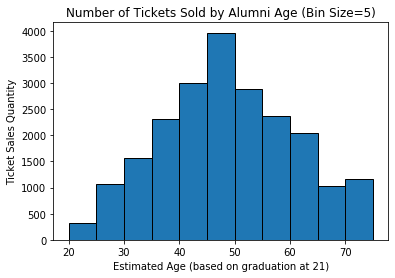

In [15]:
# Estimate ages

AGE_OF_GRAD = 21

bins = np.arange(20, 80, BIN_SIZE)
ages = []
for year in sales_graduation_years:
    ages.append(2020 - (year - AGE_OF_GRAD))

plt.hist(x=ages, bins=bins, edgecolor='black')
plt.title(f'Number of Tickets Sold by Alumni Age (Bin Size={BIN_SIZE})')
plt.ylabel('Ticket Sales Quantity')
plt.xlabel('Estimated Age (based on graduation at 21)')


Text(0.5, 0, 'Graduation Year')

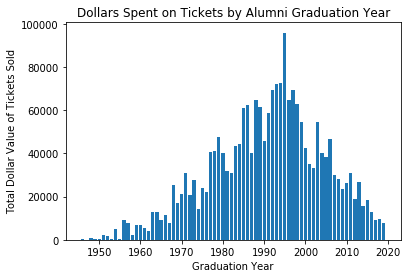

In [7]:
from collections import defaultdict

# Find total dollars spent by alumni by grad. year
rev_per_year = defaultdict(int)

for i, year in enumerate(merge['Primary Degree Class Year']):
    if year > 1900:
        rev_per_year[year] += merge['Item Cost'][i]
    
    
rpy = dict(sorted(rev_per_year.items()))
rpy
# 1958.0: 2421.62
#list(rev_per_year.keys())
# list(rev_per_year.values())

years = list(rpy.keys())
values = list(rpy.values())

plt.bar(years, values, align='center')
plt.title('Dollars Spent on Tickets by Alumni Graduation Year')
plt.ylabel('Total Dollar Value of Tickets Sold')
plt.xlabel('Graduation Year')

Text(0.5, 0, 'Estimated Age (based on graduation at 21)')

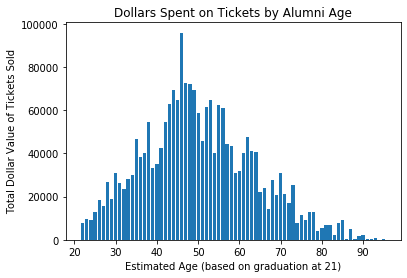

In [8]:
ages = []
for year in years:
    ages.append(2020 - (year - AGE_OF_GRAD))
    
plt.bar(ages, values, align='center')
plt.title('Dollars Spent on Tickets by Alumni Age')
plt.ylabel('Total Dollar Value of Tickets Sold')
plt.xlabel('Estimated Age (based on graduation at 21)')

Text(0.5, 0, 'Graduation Year')

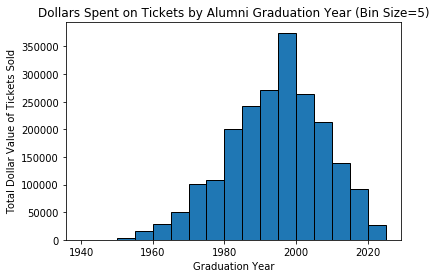

In [13]:
# Bin total dollars spent on tickets
BIN_SIZE = 5

rev_per_bin = defaultdict(int)

current_bin = 1940

# rev_per_bin[1940] represents all tickets sold from 1940 to (1940 + BIN_SIZE)
for year in range(1940, 2020):
    rev_per_bin[current_bin] += rev_per_year[year]
    if year > current_bin:
        current_bin += BIN_SIZE
        

years = list(rev_per_bin.keys())
values = list(rev_per_bin.values())

plt.bar(years, values, align='edge', width=5, edgecolor='black')
plt.title(f'Dollars Spent on Tickets by Alumni Graduation Year (Bin Size={BIN_SIZE})')
plt.ylabel('Total Dollar Value of Tickets Sold')
plt.xlabel('Graduation Year')

Text(0.5, 0, 'Estimated Age (based on graduation at 21)')

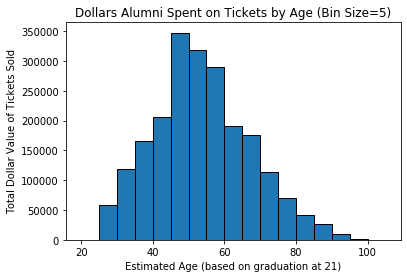

In [14]:
rev_per_bin_age = defaultdict(int)

current_bin = 20

# rev_per_bin[20] represents all tickets sold to alumni age 20 to (20 + BIN_SIZE)
for year in range(2020, 1940, -1):
    age = (2020 - (year - AGE_OF_GRAD))
    rev_per_bin_age[current_bin] += rev_per_year[year]
    if age > current_bin:
        current_bin += BIN_SIZE


ages = list(rev_per_bin_age.keys())
values = list(rev_per_bin_age.values())

plt.bar(ages, values, align='edge', width=5, edgecolor='black')
plt.title(f'Dollars Alumni Spent on Tickets by Age (Bin Size={BIN_SIZE})')
plt.ylabel('Total Dollar Value of Tickets Sold')
plt.xlabel('Estimated Age (based on graduation at 21)')